In [19]:
import pandas as pd
import numpy as np
from load_data import *
from config import *
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from cal_accuracy import *
import xgboost as xgb
import pickle


In [20]:
# train_path = r'./input/train_features_83_add.xlsx'
# train_path = r'./input/train_features_all.xlsx'
train_path = r'./input/train_add_20_test.xlsx'
# train_path = r'./input/final_features_add_test.xlsx'
# train_path = r'./input/yu_83_add_20.xlsx'
# test_path = r'./input/test_features.xlsx'
# test_path = r'./joke/test.xlsx'
test_path = r'./input/yu_test.xlsx'
train_X, train_y = load_train(train_path, columns=used_feature_columns)
test_X, test_y = load_test(test_path, columns=used_feature_columns)

test_X

,1_mean,2_mean,3_mean,4_mean,5_mean,6_mean,7_mean,8_mean,9_mean,10_mean,...,11_std,12_std,13_std,14_std,15_std,16_std,17_std,18_std,19_std,20_std
0,1.172273,-1.274737,1.851562,0.129604,1.729761,-0.989124,1.752108,0.175035,0.842806,0.657461,...,-0.109655,0.588499,0.766626,-0.238994,-0.593004,-0.058260,0.097122,-0.050956,-0.253246,-0.055510
1,0.009043,-0.311372,-0.323405,-1.281202,0.770903,-1.709215,-0.421384,-1.855744,0.493540,0.395743,...,-0.347060,0.266998,0.607816,-0.387870,-0.078945,0.240491,0.028128,-0.172711,-0.352281,0.106307
2,1.105784,-2.159100,1.751688,-1.447380,0.737683,-1.563550,1.408803,-1.658443,-0.021500,0.781493,...,-0.433762,0.282233,0.554544,0.810054,0.187389,-0.229158,-0.225954,0.389086,-0.057622,0.064894
3,1.464200,-2.435792,1.074088,-0.695247,1.975593,-0.440213,1.278363,0.253882,1.386110,2.316791,...,-0.873152,-1.032091,-0.882434,-0.937943,-0.837120,-0.698764,-0.580073,-0.968379,-0.555072,-0.819271
4,-2.647734,-4.762497,3.394864,-1.029534,-1.209138,0.107633,-0.568016,3.907602,-1.169201,0.048372,...,-1.148096,-0.995979,-1.189797,-0.892574,-0.736773,-0.940245,-0.663009,-0.475020,-0.672318,-0.802500
5,1.052975,-0.822801,1.053369,-0.090206,0.736369,-1.582310,1.472456,-0.226447,0.106370,-0.256724,...,-0.293306,-1.035794,-0.753099,-0.802514,-0.915855,-0.794605,-0.318582,-0.727672,-0.389723,-0.412373
6,1.547175,-2.273027,0.207717,-2.871914,0.070369,-2.766756,0.794214,-0.472373,0.825769,1.115791,...,-0.413757,0.120774,-0.516560,-0.549063,-0.679821,-0.990109,-0.778762,-0.702108,-0.405002,-0.399430
7,0.342421,-0.285500,-0.188212,1.368925,1.335570,-1.464001,0.482317,-0.532785,0.079833,-1.176050,...,0.974708,0.784535,1.032816,1.219041,0.655570,0.880228,0.549301,0.354520,-0.059160,0.211721
8,0.828005,-0.961625,1.758720,-0.217458,2.112268,-1.394714,2.216609,0.700955,1.308746,0.727548,...,1.634203,1.432919,0.885622,0.911621,1.144126,1.103133,0.685635,0.550567,0.300368,0.252266
9,1.083010,-0.317356,0.464911,0.832712,-0.653658,1.082125,0.823997,2.028625,0.143470,0.843101,...,-0.872858,-1.215587,-1.083904,-0.959247,-0.889331,-1.088441,-0.724269,-1.088534,-0.920416,-0.782184


In [21]:
train_X

,1_mean,2_mean,3_mean,4_mean,5_mean,6_mean,7_mean,8_mean,9_mean,10_mean,...,11_std,12_std,13_std,14_std,15_std,16_std,17_std,18_std,19_std,20_std
0,1.260634,-0.839370,0.877118,-1.132260,0.452647,-1.009155,0.886863,-0.393859,1.014557,1.086061,...,0.568080,0.343546,0.731488,-0.323941,-0.060622,0.294957,-0.035094,0.091627,-0.121635,-0.034929
1,0.769166,-0.344861,-0.002935,-0.967760,0.370853,-1.797233,-0.792871,-1.131642,0.181828,-0.353756,...,-0.239333,0.674387,0.505110,-0.663279,-0.577932,0.449949,0.092061,-0.964913,-0.401354,-0.146623
2,0.303193,0.563546,-0.918343,0.483973,-0.290193,0.579499,0.030390,0.448030,0.413529,0.317681,...,-0.430506,0.440676,-0.077357,0.286908,0.837540,1.132513,0.406212,0.534563,0.697953,0.682168
3,-0.697740,0.804644,-0.116847,1.077321,-1.565621,-0.112470,-0.183078,-1.269156,-1.720835,-1.672524,...,0.650268,1.155101,1.108489,0.285388,1.353224,0.379598,0.561195,1.081958,0.796029,1.523175
4,0.886364,-0.213352,0.419007,-1.202315,0.483316,-1.399463,0.129059,-0.987315,-0.269161,-0.219576,...,-0.423748,-0.364047,-0.433956,-0.768630,-0.477348,-0.293173,-0.547947,-0.733509,-0.532192,-0.473170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-0.641744,0.379598,-0.157781,1.047464,0.068265,0.908377,-0.036595,1.503705,-0.920149,-0.378745,...,-0.323802,-0.069401,-0.982711,0.246407,-0.625243,-0.766953,0.130262,-0.659774,-0.641568,-0.957241
99,-1.719852,0.504029,-1.372312,0.614581,-2.038720,1.498278,-1.963680,1.123692,-0.344606,0.591799,...,1.573491,2.378889,2.662306,0.528987,2.689730,2.270940,2.197986,2.525400,2.512459,2.856119
100,-3.100039,0.796028,-0.470250,-0.393587,-0.707935,0.175949,0.547509,0.770126,0.548842,1.244194,...,1.773307,2.370671,2.843253,1.940536,4.528869,3.733346,2.350214,2.642828,1.774789,3.399883
101,-0.026902,-0.857370,1.447304,0.382346,1.530679,-0.521975,1.664960,0.465741,0.653580,0.569849,...,0.062765,0.812800,0.997664,-0.076950,-0.420025,0.269176,0.288808,0.229664,-0.068556,0.224335


In [22]:
# 1. 支持向量机回归
svr = SVR(kernel='rbf', C=10, gamma=0.05)
# svr = SVR(kernel='rbf', C=10, gamma=10)
# svr = SVR(kernel='rbf', C=10, gamma=0.25)
# svr = SVR(kernel='poly', C=10, epsilon=0.1, gamma=1, degree=3)
# svr = SVR(kernel='linear', C=1, gamma=0.5)
svr.fit(train_X, train_y)
predict = svr.predict(test_X)
predict

array([3.96304388, 5.44067362, 4.71853297, 5.71713233, 4.85263894,
       5.54033306, 5.77647867, 6.16142994, 5.310767  , 5.23018392,
       5.62777304, 5.0192233 , 5.36996997, 6.17082377, 4.67248669,
       5.27183016, 4.63434858, 5.49085568, 4.81354681, 5.13859023,
       4.63796948, 5.77124772, 5.90891147, 4.77718977, 4.76887695,
       3.30944073, 5.71457369, 5.06684494, 4.95530635, 5.19668899,
       5.60566252, 4.76740428, 3.99675482, 3.80902008, 4.68910338,
       4.7103056 , 5.77873977, 4.83668777, 4.29158088, 3.83901567,
       3.40796823, 3.94224714, 4.47398399, 4.56385464, 4.17387516,
       4.4115646 , 4.19442971, 4.33766519, 5.27167014, 4.99418944,
       4.85639995, 4.77458813, 4.99595515, 4.75825581, 6.3718098 ,
       2.99795494, 4.65620843, 4.20604144, 5.35956896, 4.74955542])

In [23]:
# with open(r'./output/model.pkl', 'wb') as file:
#     pickle.dump(svr, file)

In [24]:
# # 2. 随机森林回归
# rf_model = RandomForestRegressor(n_estimators=300, max_depth=100, random_state=1)
# rf_model.fit(train_X, train_y)

In [25]:
# 3. xgboost



In [26]:
# # 4. 神经网络回归
# # 创建一个神经网络回归模型
# mlp_model = MLPRegressor(hidden_layer_sizes=(10, 20, 30), max_iter=200, solver='adam', activation='relu',
#                          early_stopping=True)
# mlp_model.fit(train_X, train_y)

In [27]:
# # 5. 决策树回归
# dtr_model = DecisionTreeRegressor()
# dtr_model.fit(train_X, train_y)

In [28]:
# model = rf_model
model = svr
# model = mlp_model
# model = dtr_model
predict = model.predict(test_X)

In [29]:
a = pd.DataFrame()
a['predict'] = predict
a['true'] = test_y
a['differnet'] = abs(test_y - predict)
a.index += 2
a

,predict,true,differnet
2,3.963044,3.550,0.413044
3,5.440674,4.300,1.140674
4,4.718533,4.250,0.468533
5,5.717132,6.125,0.407868
6,4.852639,6.025,1.172361
7,5.540333,3.600,1.940333
8,5.776479,5.750,0.026479
9,6.161430,6.750,0.588570
10,5.310767,5.675,0.364233
11,5.230184,4.750,0.480184


In [36]:
a.to_excel(r'./output/yu_result.xlsx')

In [30]:
threshold = 1
count = (a['differnet'] < threshold).sum()
acc = count / len(a)
acc

0.8666666666666667

In [31]:
avg_diff = a['differnet'].sum() / len(a)
# avg_percent = avg_diff / 8
avg_percent = avg_diff / 5
(1 - avg_percent)

0.8887277136800117

In [32]:
avg_diff

0.5563614315999413

In [33]:
r2 = r2_score(test_y, predict)
r2

0.4863185240732013

In [34]:
predict_class_list = []
true_class_list = []
for i in range(len(a)):
    i = i + 2
    predict_class, true_class = classify(a.predict[i], a.true[i])
    predict_class_list.append(predict_class)
    true_class_list.append(true_class)

acc = accuracy(predict_class_list, true_class_list)
acc

0.9

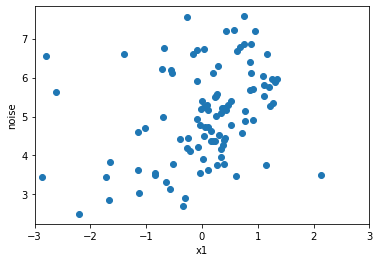

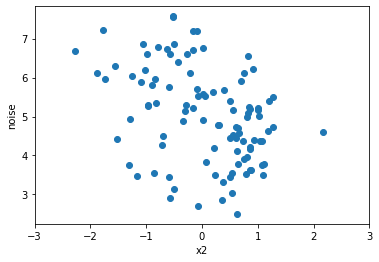

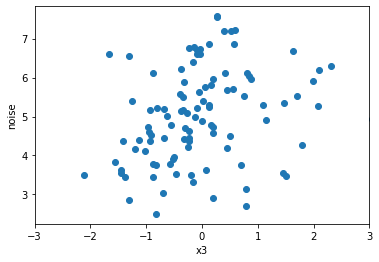

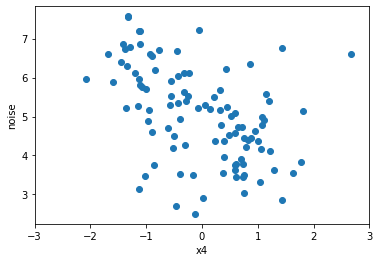

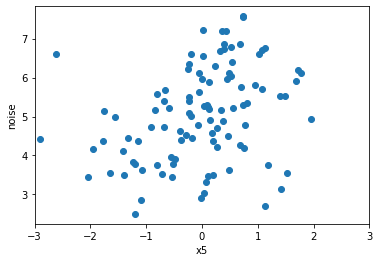

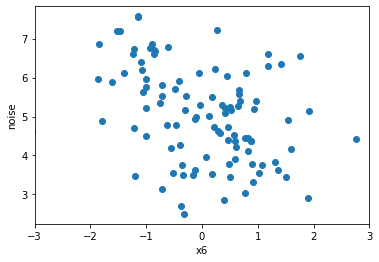

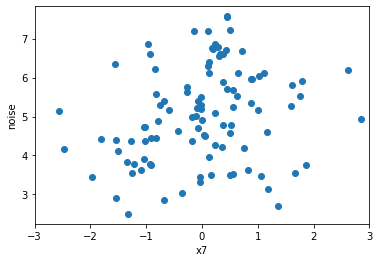

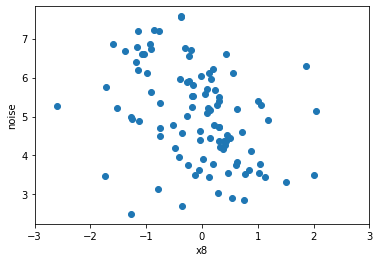

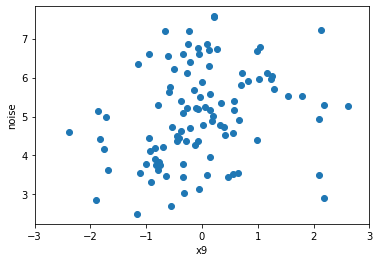

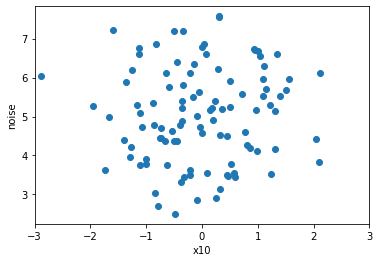

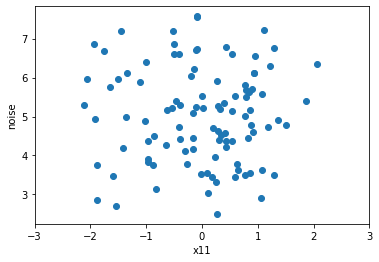

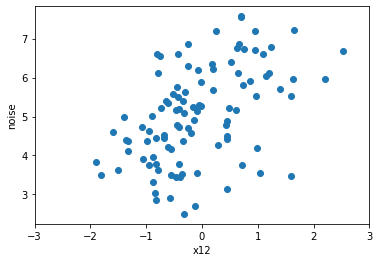

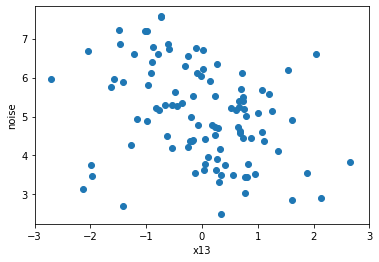

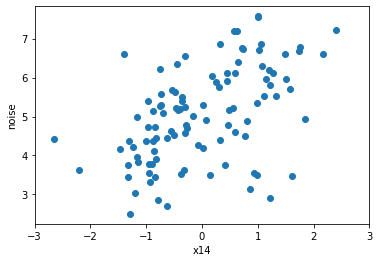

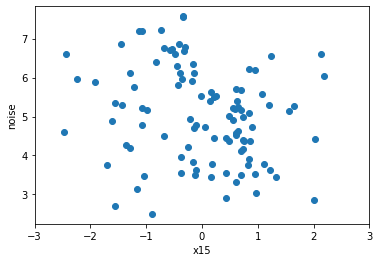

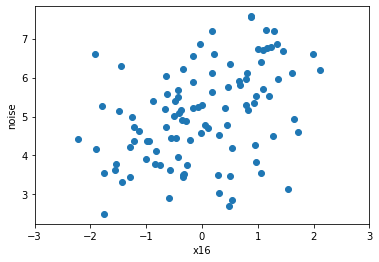

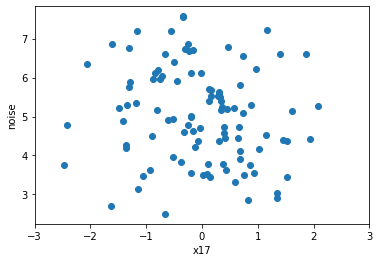

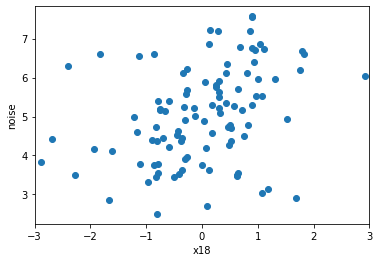

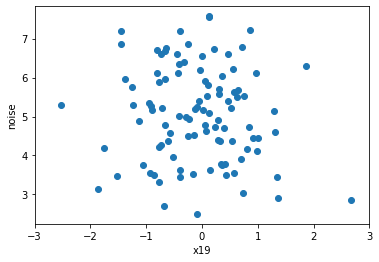

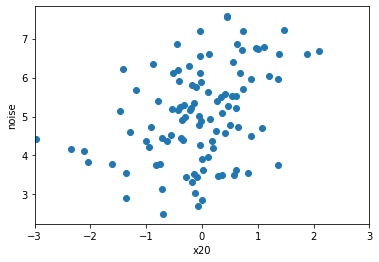

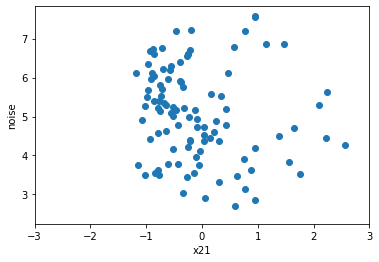

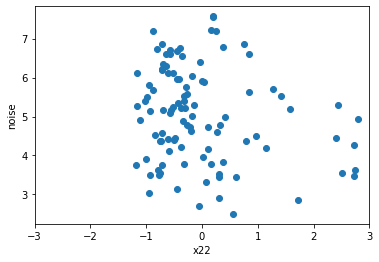

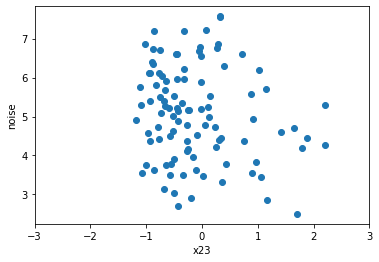

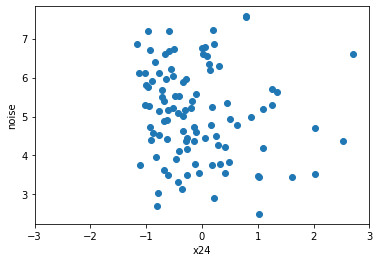

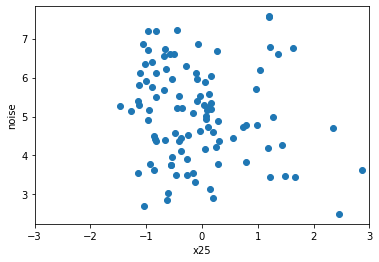

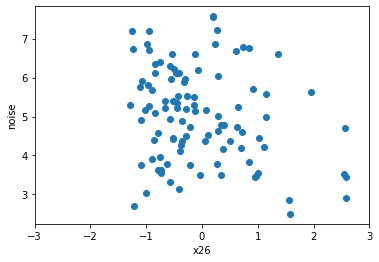

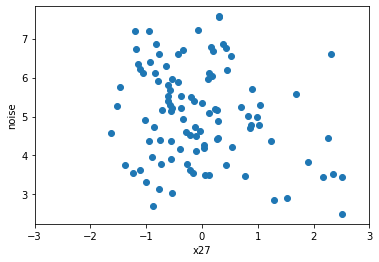

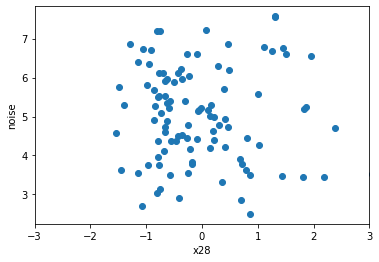

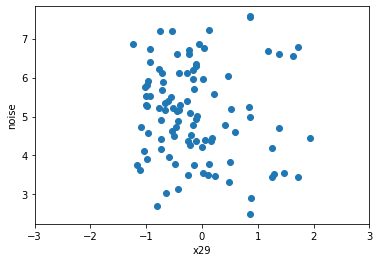

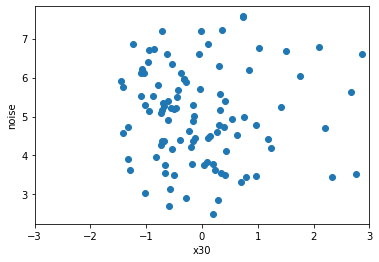

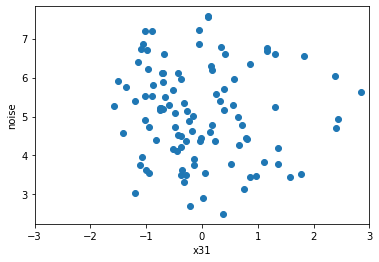

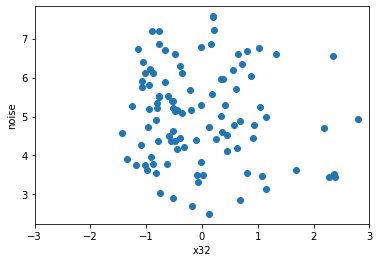

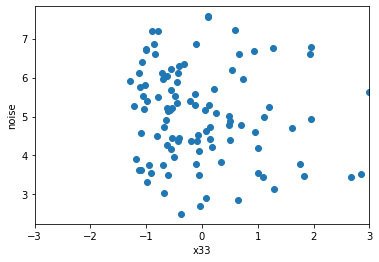

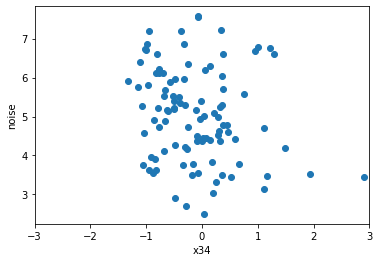

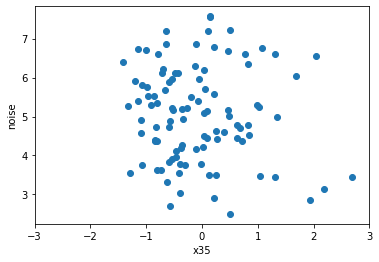

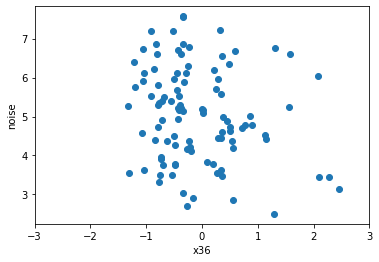

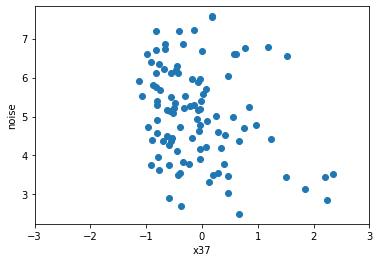

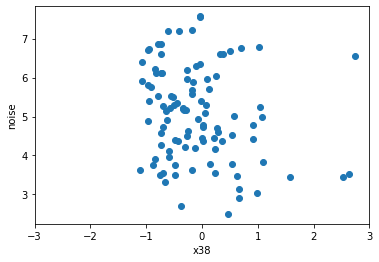

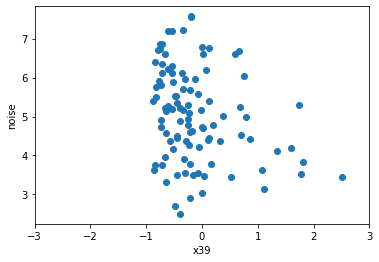

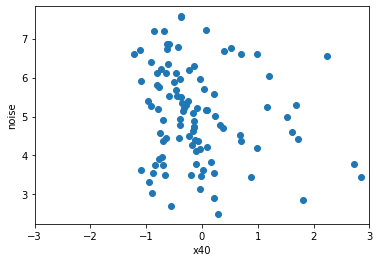

IndexError: single positional indexer is out-of-bounds

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 分别绘制每个x和y的散点图
for i in range(len(train_X)):  # 从第2列开始循环，第1列是y
    # plt.scatter(train_y, train_X.iloc[:, i])
    # plt.xlabel('noise')  # 设置x轴标签
    # plt.ylabel(f'x{i}')  # 设置y轴标签
    # plt.show()  # 显示图像
    plt.scatter(train_X.iloc[:, i], train_y)
    plt.xlim(-3, 3)
    plt.ylabel('noise')
    plt.xlabel(f'x{i+1}')
    plt.show()  # 显示图像